In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/CS 513/Video_games_esrb_rating.csv")

df2 = pd.read_csv("/content/drive/MyDrive/CS 513/test_esrb.csv")

combined_df = pd.concat([df1, df2], ignore_index=True)

df = shuffle(combined_df, random_state=42)

df = df.reset_index(drop=True)

df = df.drop(['no_descriptors'], axis=1)

df

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Maid of Sker,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,M
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
3,Batman: The Enemy Within - Season Pass,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,M
4,Skylight Freerange,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,Snow Fortress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2391,Fallen Legion: Flames of Rebellion,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2392,Mugsters,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T
2393,Asemblance: Oversight,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


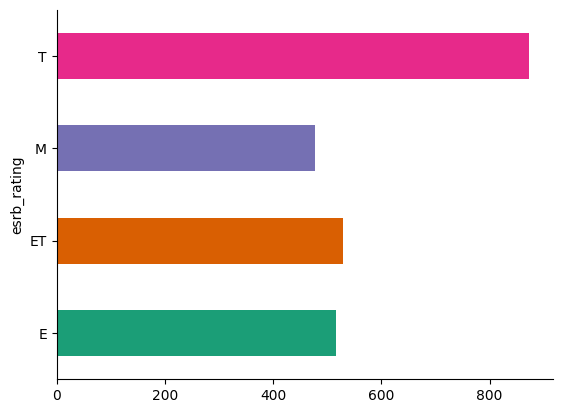

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('esrb_rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import plotly.graph_objects as go

data = []

for column in df.drop(['title','esrb_rating', 'console'], axis=1).columns:

    value_counts = df[column].value_counts()

    if 1 in value_counts.index:
        frequency_of_ones = value_counts[1]
    else:
        frequency_of_ones = 0

    bar_trace = go.Bar(
        x=[column],
        y=[frequency_of_ones],
        name=column
    )

    data.append(bar_trace)

layout = go.Layout(
    title='Frequency of 1\'s for Each Binary Variable',
    xaxis=dict(title='Variable'),
    yaxis=dict(title='Frequency of 1\'s')
)

fig = go.Figure(data=data, layout=layout)

fig.show()

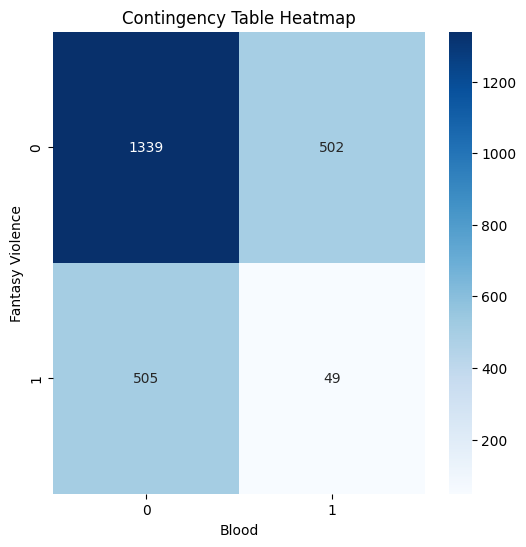

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a contingency table between two binary features
contingency_table = pd.crosstab(df['blood'], df['fantasy_violence'])

# Plot heatmap of contingency table
plt.figure(figsize=(6, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Contingency Table Heatmap')
plt.xlabel('Blood')
plt.ylabel('Fantasy Violence')
plt.show()

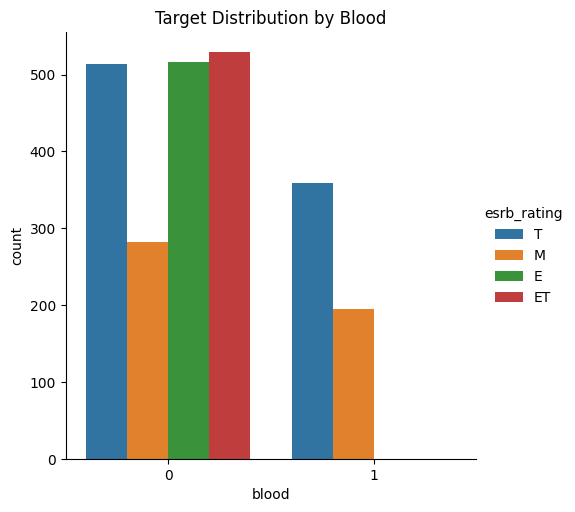

In [ ]:
import seaborn as sns

# Create a stacked bar plot to show target distribution by a binary feature
sns.catplot(x='blood', hue='esrb_rating', kind='count', data=df)
plt.title('Target Distribution by Blood')
plt.show()

## First, we will classify the data as either T or not T (either E, ET, or M) before moving on to four-class classification.

In [ ]:
 df1_bin = pd.read_csv("/content/drive/MyDrive/CS 513/Video_games_esrb_rating.csv")

df2_bin = pd.read_csv("/content/drive/MyDrive/CS 513/test_esrb.csv")

combined_df_bin = pd.concat([df1_bin, df2_bin], ignore_index=True)

df_bin = shuffle(combined_df_bin, random_state=42)

df_bin = df_bin.reset_index(drop=True)

df_bin = df_bin.drop(['no_descriptors'], axis=1)

df_bin

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Maid of Sker,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,M
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
3,Batman: The Enemy Within - Season Pass,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,M
4,Skylight Freerange,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,Snow Fortress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2391,Fallen Legion: Flames of Rebellion,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2392,Mugsters,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T
2393,Asemblance: Oversight,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
bin_map = {
    'T': 1,
    'E': 0,
    'ET': 0,
    'M': 0
}

df_bin['esrb_rating'] = df_bin['esrb_rating'].map(bin_map)
df_bin.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,Maid of Sker,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Batman: The Enemy Within - Season Pass,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Skylight Freerange,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


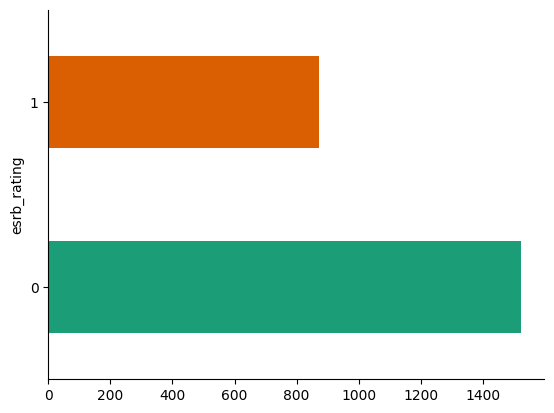

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_bin.groupby('esrb_rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## XGBoost for Binary Classification with All Features

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = df_bin.drop(['title','esrb_rating'], axis=1)
y = df_bin['esrb_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error')

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       291
           1       0.89      0.74      0.81       188

    accuracy                           0.86       479
   macro avg       0.87      0.84      0.85       479
weighted avg       0.87      0.86      0.86       479

Confusion Matrix:
[[274  17]
 [ 48 140]]


In [ ]:
# Get feature importances from the best model
feature_importances = best_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features based on importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
import plotly.express as px

fig = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importance Heatmap',
             color='Importance',  # Use feature importance values for color mapping
             color_continuous_scale='Viridis',  # Choose a color scale (e.g., Viridis)
             width=1600, height=1200)

fig.update_layout(coloraxis_colorbar=dict(title='Importance', ticks='outside', tickvals=np.linspace(0, 1, 11)))

# Show the interactive plot
fig.show()

## Creating a data frame with only the top 20 most important features based on XGBoost results

In [ ]:
df_bin_top_20 = df_bin.loc[:,['title','strong_janguage','blood','violence','crude_humor','mild_fantasy_violence','suggestive_themes','use_of_alcohol','mild_violence','blood_and_gore','mild_blood','strong_sexual_content','animated_blood','simulated_gambling','language','mild_suggestive_themes','use_of_drugs_and_alcohol','mild_lyrics','sexual_themes','cartoon_violence','lyrics','esrb_rating']]
df_bin_top_20.head()

,title,strong_janguage,blood,violence,crude_humor,mild_fantasy_violence,suggestive_themes,use_of_alcohol,mild_violence,blood_and_gore,...,animated_blood,simulated_gambling,language,mild_suggestive_themes,use_of_drugs_and_alcohol,mild_lyrics,sexual_themes,cartoon_violence,lyrics,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Maid of Sker,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Batman: The Enemy Within - Season Pass,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,Skylight Freerange,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## XGBoost for Binary Classfication with top 20 features

In [ ]:
X = df_bin_top_20.drop(['title','esrb_rating'], axis=1)
y = df_bin_top_20['esrb_rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error')

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       291
           1       0.87      0.75      0.81       188

    accuracy                           0.86       479
   macro avg       0.86      0.84      0.85       479
weighted avg       0.86      0.86      0.86       479

Confusion Matrix:
[[270  21]
 [ 47 141]]


## ANN for Binary Classification with All Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [ ]:
X = df_bin.drop(['title','esrb_rating'], axis=1)
y = df_bin['esrb_rating']

X.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
encoder = LabelEncoder()
y_train = to_categorical(encoder.fit_transform(y_train))
y_test = to_categorical(encoder.transform(y_test))

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=31, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=2)

Epoch 1/50
154/154 - 6s - loss: 0.6065 - accuracy: 0.6371 - val_loss: 0.5178 - val_accuracy: 0.6276 - 6s/epoch - 41ms/step
Epoch 2/50
154/154 - 1s - loss: 0.4585 - accuracy: 0.7617 - val_loss: 0.4324 - val_accuracy: 0.8177 - 698ms/epoch - 5ms/step
Epoch 3/50
154/154 - 1s - loss: 0.4037 - accuracy: 0.8420 - val_loss: 0.4074 - val_accuracy: 0.8203 - 784ms/epoch - 5ms/step
Epoch 4/50
154/154 - 1s - loss: 0.3469 - accuracy: 0.8629 - val_loss: 0.3863 - val_accuracy: 0.8307 - 698ms/epoch - 5ms/step
Epoch 5/50
154/154 - 1s - loss: 0.3332 - accuracy: 0.8623 - val_loss: 0.3730 - val_accuracy: 0.8177 - 1s/epoch - 9ms/step
Epoch 6/50
154/154 - 1s - loss: 0.3149 - accuracy: 0.8838 - val_loss: 0.3663 - val_accuracy: 0.8411 - 1s/epoch - 9ms/step
Epoch 7/50
154/154 - 1s - loss: 0.3050 - accuracy: 0.8864 - val_loss: 0.3503 - val_accuracy: 0.8490 - 1s/epoch - 8ms/step
Epoch 8/50
154/154 - 1s - loss: 0.2884 - accuracy: 0.8890 - val_loss: 0.3387 - val_accuracy: 0.8568 - 880ms/epoch - 6ms/step
Epoch 9/50


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

15/15 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8559
Test Loss: 0.39085477590560913, Test Accuracy: 0.855949878692627


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

15/15 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       305
           1       0.82      0.78      0.80       174

    accuracy                           0.86       479
   macro avg       0.85      0.84      0.84       479
weighted avg       0.85      0.86      0.86       479

Confusion Matrix:
[[275  30]
 [ 39 135]]


## ANN for Binary Classification with top 20 features

In [ ]:
X = df_bin_top_20.drop(['title','esrb_rating'], axis=1)
y = df_bin_top_20['esrb_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

encoder = LabelEncoder()
y_train = to_categorical(encoder.fit_transform(y_train))
y_test = to_categorical(encoder.transform(y_test))

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=2)

Epoch 1/50
154/154 - 2s - loss: 0.5768 - accuracy: 0.6547 - val_loss: 0.4994 - val_accuracy: 0.8099 - 2s/epoch - 10ms/step
Epoch 2/50
154/154 - 0s - loss: 0.4537 - accuracy: 0.8061 - val_loss: 0.4563 - val_accuracy: 0.8177 - 413ms/epoch - 3ms/step
Epoch 3/50
154/154 - 0s - loss: 0.4148 - accuracy: 0.8316 - val_loss: 0.4413 - val_accuracy: 0.7995 - 331ms/epoch - 2ms/step
Epoch 4/50
154/154 - 0s - loss: 0.4109 - accuracy: 0.8401 - val_loss: 0.4388 - val_accuracy: 0.8021 - 420ms/epoch - 3ms/step
Epoch 5/50
154/154 - 0s - loss: 0.3858 - accuracy: 0.8401 - val_loss: 0.4287 - val_accuracy: 0.8021 - 311ms/epoch - 2ms/step
Epoch 6/50
154/154 - 0s - loss: 0.3803 - accuracy: 0.8492 - val_loss: 0.4152 - val_accuracy: 0.8229 - 278ms/epoch - 2ms/step
Epoch 7/50
154/154 - 0s - loss: 0.3784 - accuracy: 0.8446 - val_loss: 0.4195 - val_accuracy: 0.8073 - 294ms/epoch - 2ms/step
Epoch 8/50
154/154 - 0s - loss: 0.3692 - accuracy: 0.8512 - val_loss: 0.4037 - val_accuracy: 0.8151 - 284ms/epoch - 2ms/step
Ep

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

15/15 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8539
Test Loss: 0.36682188510894775, Test Accuracy: 0.8538622260093689


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

15/15 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       305
           1       0.81      0.78      0.79       174

    accuracy                           0.85       479
   macro avg       0.84      0.84      0.84       479
weighted avg       0.85      0.85      0.85       479

Confusion Matrix:
[[274  31]
 [ 39 135]]


## XGBoost for Multiclass Classification with All Features:

In [ ]:
map = {
    'T': 0,
    'E': 1,
    'ET': 2,
    'M': 3
}

df['esrb_rating'] = df['esrb_rating'].map(map)
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Maid of Sker,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Batman: The Enemy Within - Season Pass,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,Skylight Freerange,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,3


In [ ]:
X = df.drop(['title','esrb_rating'], axis=1)
y = df['esrb_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = xgb.XGBClassifier(objective='multi:softmax',
                          num_class=4,
                          eval_metric='merror')

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 15],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 50}
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       188
           1       0.94      0.99      0.97        98
           2       0.76      0.86      0.81       104
           3       0.84      0.90      0.87        89

    accuracy                           0.85       479
   macro avg       0.85      0.88      0.86       479
weighted avg       0.86      0.85      0.85       479

Confusion Matrix:
[[143   2  28  15]
 [  1  97   0   0]
 [ 11   4  89   0]
 [  9   0   0  80]]


In [ ]:
# Get feature importances from the best model
feature_importances = best_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features based on importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
import plotly.express as px

fig = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importance Heatmap',
             color='Importance',  # Use feature importance values for color mapping
             color_continuous_scale='Viridis',  # Choose a color scale (e.g., Viridis)
             width=1600, height=1200)

fig.update_layout(coloraxis_colorbar=dict(title='Importance', ticks='outside', tickvals=np.linspace(0, 1, 11)))

# Show the interactive plot
fig.show()

## Creating a data frame with only the top 20 most important features based on multiclass XGBoost results

In [ ]:
df_top_20 = df.loc[:,['title','strong_janguage','blood','blood_and_gore','fantasy_violence','cartoon_violence','mild_fantasy_violence','violence','crude_humor','strong_sexual_content','mild_violence','animated_blood','suggestive_themes','intense_violence','sexual_themes','mild_blood','language','alcohol_reference','simulated_gambling','mild_suggestive_themes','use_of_alcohol','esrb_rating']]
df_top_20.head()

,title,strong_janguage,blood,blood_and_gore,fantasy_violence,cartoon_violence,mild_fantasy_violence,violence,crude_humor,strong_sexual_content,...,suggestive_themes,intense_violence,sexual_themes,mild_blood,language,alcohol_reference,simulated_gambling,mild_suggestive_themes,use_of_alcohol,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Maid of Sker,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Batman: The Enemy Within - Season Pass,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Skylight Freerange,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3


## XGBoost for Multiclass Classification with top 20 features

In [ ]:
X = df_top_20.drop(['title','esrb_rating'], axis=1)
y = df_top_20['esrb_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = xgb.XGBClassifier(objective='multi:softmax',
                          num_class=4,
                          eval_metric='merror')

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       188
           1       0.89      0.98      0.93        98
           2       0.77      0.85      0.81       104
           3       0.84      0.90      0.87        89

    accuracy                           0.85       479
   macro avg       0.84      0.87      0.86       479
weighted avg       0.85      0.85      0.85       479

Confusion Matrix:
[[142   7  24  15]
 [  0  96   2   0]
 [ 11   5  88   0]
 [  9   0   0  80]]


## ANN for Multiclass Classification with All Features

In [ ]:
X = df.drop(['title','esrb_rating'], axis=1)
y = df['esrb_rating']

X.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
encoder = LabelEncoder()
y_train = to_categorical(encoder.fit_transform(y_train))
y_test = to_categorical(encoder.transform(y_test))

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=31, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=35, batch_size=5, validation_split=0.2, verbose=2)

Epoch 1/35
307/307 - 2s - loss: 1.1119 - accuracy: 0.5653 - val_loss: 0.7262 - val_accuracy: 0.7240 - 2s/epoch - 6ms/step
Epoch 2/35
307/307 - 1s - loss: 0.6016 - accuracy: 0.7715 - val_loss: 0.5027 - val_accuracy: 0.7891 - 555ms/epoch - 2ms/step
Epoch 3/35
307/307 - 0s - loss: 0.4706 - accuracy: 0.8179 - val_loss: 0.4582 - val_accuracy: 0.7943 - 467ms/epoch - 2ms/step
Epoch 4/35
307/307 - 1s - loss: 0.4285 - accuracy: 0.8270 - val_loss: 0.4487 - val_accuracy: 0.8203 - 524ms/epoch - 2ms/step
Epoch 5/35
307/307 - 0s - loss: 0.3965 - accuracy: 0.8557 - val_loss: 0.4372 - val_accuracy: 0.8203 - 464ms/epoch - 2ms/step
Epoch 6/35
307/307 - 1s - loss: 0.3992 - accuracy: 0.8538 - val_loss: 0.4512 - val_accuracy: 0.7995 - 549ms/epoch - 2ms/step
Epoch 7/35
307/307 - 1s - loss: 0.3648 - accuracy: 0.8584 - val_loss: 0.4405 - val_accuracy: 0.8099 - 532ms/epoch - 2ms/step
Epoch 8/35
307/307 - 0s - loss: 0.3676 - accuracy: 0.8538 - val_loss: 0.4205 - val_accuracy: 0.8411 - 477ms/epoch - 2ms/step
Epo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

15/15 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8392
Test Loss: 0.4083271026611328, Test Accuracy: 0.8392484188079834


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

15/15 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       174
           1       0.95      0.96      0.95       108
           2       0.72      0.82      0.77        97
           3       0.89      0.85      0.87       100

    accuracy                           0.84       479
   macro avg       0.84      0.85      0.85       479
weighted avg       0.84      0.84      0.84       479

Confusion Matrix:
[[133   3  29   9]
 [  2 104   2   0]
 [ 13   3  80   1]
 [ 15   0   0  85]]


## ANN for Multiclass Classification with top 20 features

In [ ]:
X = df_top_20.drop(['title','esrb_rating'], axis=1)
y = df_top_20['esrb_rating']

X.head()

,strong_janguage,blood,blood_and_gore,fantasy_violence,cartoon_violence,mild_fantasy_violence,violence,crude_humor,strong_sexual_content,mild_violence,animated_blood,suggestive_themes,intense_violence,sexual_themes,mild_blood,language,alcohol_reference,simulated_gambling,mild_suggestive_themes,use_of_alcohol
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
encoder = LabelEncoder()
y_train = to_categorical(encoder.fit_transform(y_train))
y_test = to_categorical(encoder.transform(y_test))

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=35, batch_size=5, validation_split=0.2, verbose=2)

Epoch 1/35
307/307 - 2s - loss: 1.0279 - accuracy: 0.5862 - val_loss: 0.6074 - val_accuracy: 0.7526 - 2s/epoch - 5ms/step
Epoch 2/35
307/307 - 1s - loss: 0.5350 - accuracy: 0.8179 - val_loss: 0.4617 - val_accuracy: 0.8151 - 567ms/epoch - 2ms/step
Epoch 3/35
307/307 - 0s - loss: 0.4415 - accuracy: 0.8407 - val_loss: 0.4536 - val_accuracy: 0.8359 - 455ms/epoch - 1ms/step
Epoch 4/35
307/307 - 1s - loss: 0.4372 - accuracy: 0.8401 - val_loss: 0.4284 - val_accuracy: 0.8307 - 664ms/epoch - 2ms/step
Epoch 5/35
307/307 - 1s - loss: 0.4040 - accuracy: 0.8570 - val_loss: 0.4293 - val_accuracy: 0.8229 - 655ms/epoch - 2ms/step
Epoch 6/35
307/307 - 1s - loss: 0.4013 - accuracy: 0.8499 - val_loss: 0.4331 - val_accuracy: 0.8203 - 684ms/epoch - 2ms/step
Epoch 7/35
307/307 - 0s - loss: 0.3966 - accuracy: 0.8544 - val_loss: 0.4319 - val_accuracy: 0.8438 - 466ms/epoch - 2ms/step
Epoch 8/35
307/307 - 0s - loss: 0.3901 - accuracy: 0.8597 - val_loss: 0.4285 - val_accuracy: 0.8229 - 456ms/epoch - 1ms/step
Epo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

15/15 [==============================] - 0s 3ms/step - loss: 0.4434 - accuracy: 0.8476
Test Loss: 0.4433995187282562, Test Accuracy: 0.8475991487503052


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

15/15 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       174
           1       0.96      0.96      0.96       108
           2       0.78      0.84      0.81        97
           3       0.85      0.85      0.85       100

    accuracy                           0.85       479
   macro avg       0.85      0.86      0.85       479
weighted avg       0.85      0.85      0.85       479

Confusion Matrix:
[[136   2  21  15]
 [  2 104   2   0]
 [ 14   2  81   0]
 [ 15   0   0  85]]


# KNN (Binary Classification + All Features)

In [ ]:
combined_df_bin = pd.concat([df1_bin, df2_bin], ignore_index=True)

df_bin = shuffle(combined_df_bin, random_state=42)
df_bin = df_bin.reset_index(drop=True)
df_bin = df_bin.drop(['no_descriptors'], axis=1)
bin_map = {
    'T': 1,
    'E': 0,
    'ET': 0,
    'M': 0
}
df_bin['esrb_rating'] = df_bin['esrb_rating'].map(bin_map)
df_bin.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,Maid of Sker,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Batman: The Enemy Within - Season Pass,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Skylight Freerange,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
attr = df_bin.drop(columns = ['title', 'esrb_rating'])
target = df_bin['esrb_rating']
attr.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.20, random_state = 4, shuffle = True)

k_values = [2, 3, 5, 7, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    accuracy = accuracy_score(target_test,target_pred )
    print(f'Accuracy of model with k = {k}: {accuracy}')
    print('')

Accuracy of model with k = 2: 0.8225469728601252

Accuracy of model with k = 3: 0.8663883089770354

Accuracy of model with k = 5: 0.8830897703549061

Accuracy of model with k = 7: 0.8768267223382046

Accuracy of model with k = 10: 0.8622129436325678



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Confusion Matrix
[[302  19]
 [ 47 111]]

Accuracy score
0.8622129436325678

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       321
           1       0.85      0.70      0.77       158

    accuracy                           0.86       479
   macro avg       0.86      0.82      0.84       479
weighted avg       0.86      0.86      0.86       479



# KNN (Multiclass + All Features)

In [ ]:
attr = df.drop(columns = ['title', 'esrb_rating'])
target  = df['esrb_rating']
attr.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
attr_train, attr_test, target_train, target_test  = train_test_split(attr, target,test_size = 0.20, random_state = 4, shuffle = True)

k_values = [2, 3, 5, 7, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    accuracy = accuracy_score(target_test,target_pred )
    print(f'Accuracy of model with k = {k}: {accuracy}')
    print('')

Accuracy of model with k = 2: 0.7849686847599165

Accuracy of model with k = 3: 0.8329853862212944

Accuracy of model with k = 5: 0.8475991649269311

Accuracy of model with k = 7: 0.8288100208768268

Accuracy of model with k = 10: 0.8204592901878914



In [ ]:
cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Confusion Matrix
[[103   1   0   0]
 [ 19  80   0   7]
 [  2   2  95  12]
 [ 10  26   7 115]]

Accuracy score
0.8204592901878914

Classification Report
              precision    recall  f1-score   support

           E       0.77      0.99      0.87       104
          ET       0.73      0.75      0.74       106
           M       0.93      0.86      0.89       111
           T       0.86      0.73      0.79       158

    accuracy                           0.82       479
   macro avg       0.82      0.83      0.82       479
weighted avg       0.83      0.82      0.82       479



# KNN (Binary Classification + Top 20)

In [ ]:
attr = df_bin_top_20.drop(columns = ['title', 'esrb_rating'])
target = df_bin_top_20['esrb_rating']
attr.head()

,strong_janguage,blood,violence,crude_humor,mild_fantasy_violence,suggestive_themes,use_of_alcohol,mild_violence,blood_and_gore,mild_blood,strong_sexual_content,animated_blood,simulated_gambling,language,mild_suggestive_themes,use_of_drugs_and_alcohol,mild_lyrics,sexual_themes,cartoon_violence,lyrics
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.20, random_state = 4, shuffle = True)

k_values = [2, 3, 5, 7, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    accuracy = accuracy_score(target_test,target_pred )
    print(f'Accuracy of model with k = {k}: {accuracy}')
    print('')

Accuracy of model with k = 2: 0.8225469728601252

Accuracy of model with k = 3: 0.8496868475991649

Accuracy of model with k = 5: 0.8893528183716075

Accuracy of model with k = 7: 0.8663883089770354

Accuracy of model with k = 10: 0.8517745302713987



In [ ]:
cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Confusion Matrix
[[290  31]
 [ 40 118]]

Accuracy score
0.8517745302713987

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       321
           1       0.79      0.75      0.77       158

    accuracy                           0.85       479
   macro avg       0.84      0.83      0.83       479
weighted avg       0.85      0.85      0.85       479



# KNN (Multiclass + Top 20)

In [ ]:
map = {
    'T': 0,
    'E': 1,
    'ET': 2,
    'M': 3
}
df_top_20['esrb_rating'] = df_top_20['esrb_rating'].map(map)
df_top_20.head()

,title,strong_janguage,blood,blood_and_gore,fantasy_violence,cartoon_violence,mild_fantasy_violence,violence,crude_humor,strong_sexual_content,...,suggestive_themes,intense_violence,sexual_themes,mild_blood,language,alcohol_reference,simulated_gambling,mild_suggestive_themes,use_of_alcohol,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Maid of Sker,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Batman: The Enemy Within - Season Pass,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Skylight Freerange,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3


In [ ]:
attr = df_top_20.drop(columns = ['title', 'esrb_rating'])
target = df_top_20['esrb_rating']
attr.head()

,strong_janguage,blood,blood_and_gore,fantasy_violence,cartoon_violence,mild_fantasy_violence,violence,crude_humor,strong_sexual_content,mild_violence,animated_blood,suggestive_themes,intense_violence,sexual_themes,mild_blood,language,alcohol_reference,simulated_gambling,mild_suggestive_themes,use_of_alcohol
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.20, random_state = 4, shuffle = True)

k_values = [2, 3, 5, 7, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    accuracy = accuracy_score(target_test,target_pred )
    print(f'Accuracy of model with k = {k}: {accuracy}')
    print('')

Accuracy of model with k = 2: 0.8225469728601252

Accuracy of model with k = 3: 0.8475991649269311

Accuracy of model with k = 5: 0.8350730688935282

Accuracy of model with k = 7: 0.8350730688935282

Accuracy of model with k = 10: 0.8434237995824635



In [ ]:
cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Confusion Matrix
[[130   5  16   7]
 [  0 102   2   0]
 [ 16   9  81   0]
 [ 16   3   1  91]]

Accuracy score
0.8434237995824635

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       158
           1       0.86      0.98      0.91       104
           2       0.81      0.76      0.79       106
           3       0.93      0.82      0.87       111

    accuracy                           0.84       479
   macro avg       0.85      0.85      0.85       479
weighted avg       0.85      0.84      0.84       479



# C5.0 (Binary Classification + All Features)

In [ ]:
bin_map = {
  'T': 1,
  'E': 0,
  'ET': 0,
  'M': 0
}
df_bin['esrb_rating'] = df_bin['esrb_rating'].map(bin_map)
df_bin.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,Maid of Sker,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Batman: The Enemy Within - Season Pass,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Skylight Freerange,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

attr = df_bin.drop(['esrb_rating', 'title'], axis = 1)
target = df_bin['esrb_rating']
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size = 0.2, random_state = 7)
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, splitter = 'best', max_leaf_nodes = 8)
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

In [ ]:
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}")
print(f"\n Confusion Matrix:")
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.8496868475991649

 Confusion Matrix:
[[283  22]
 [ 50 124]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       305
           1       0.85      0.71      0.77       174

    accuracy                           0.85       479
   macro avg       0.85      0.82      0.83       479
weighted avg       0.85      0.85      0.85       479



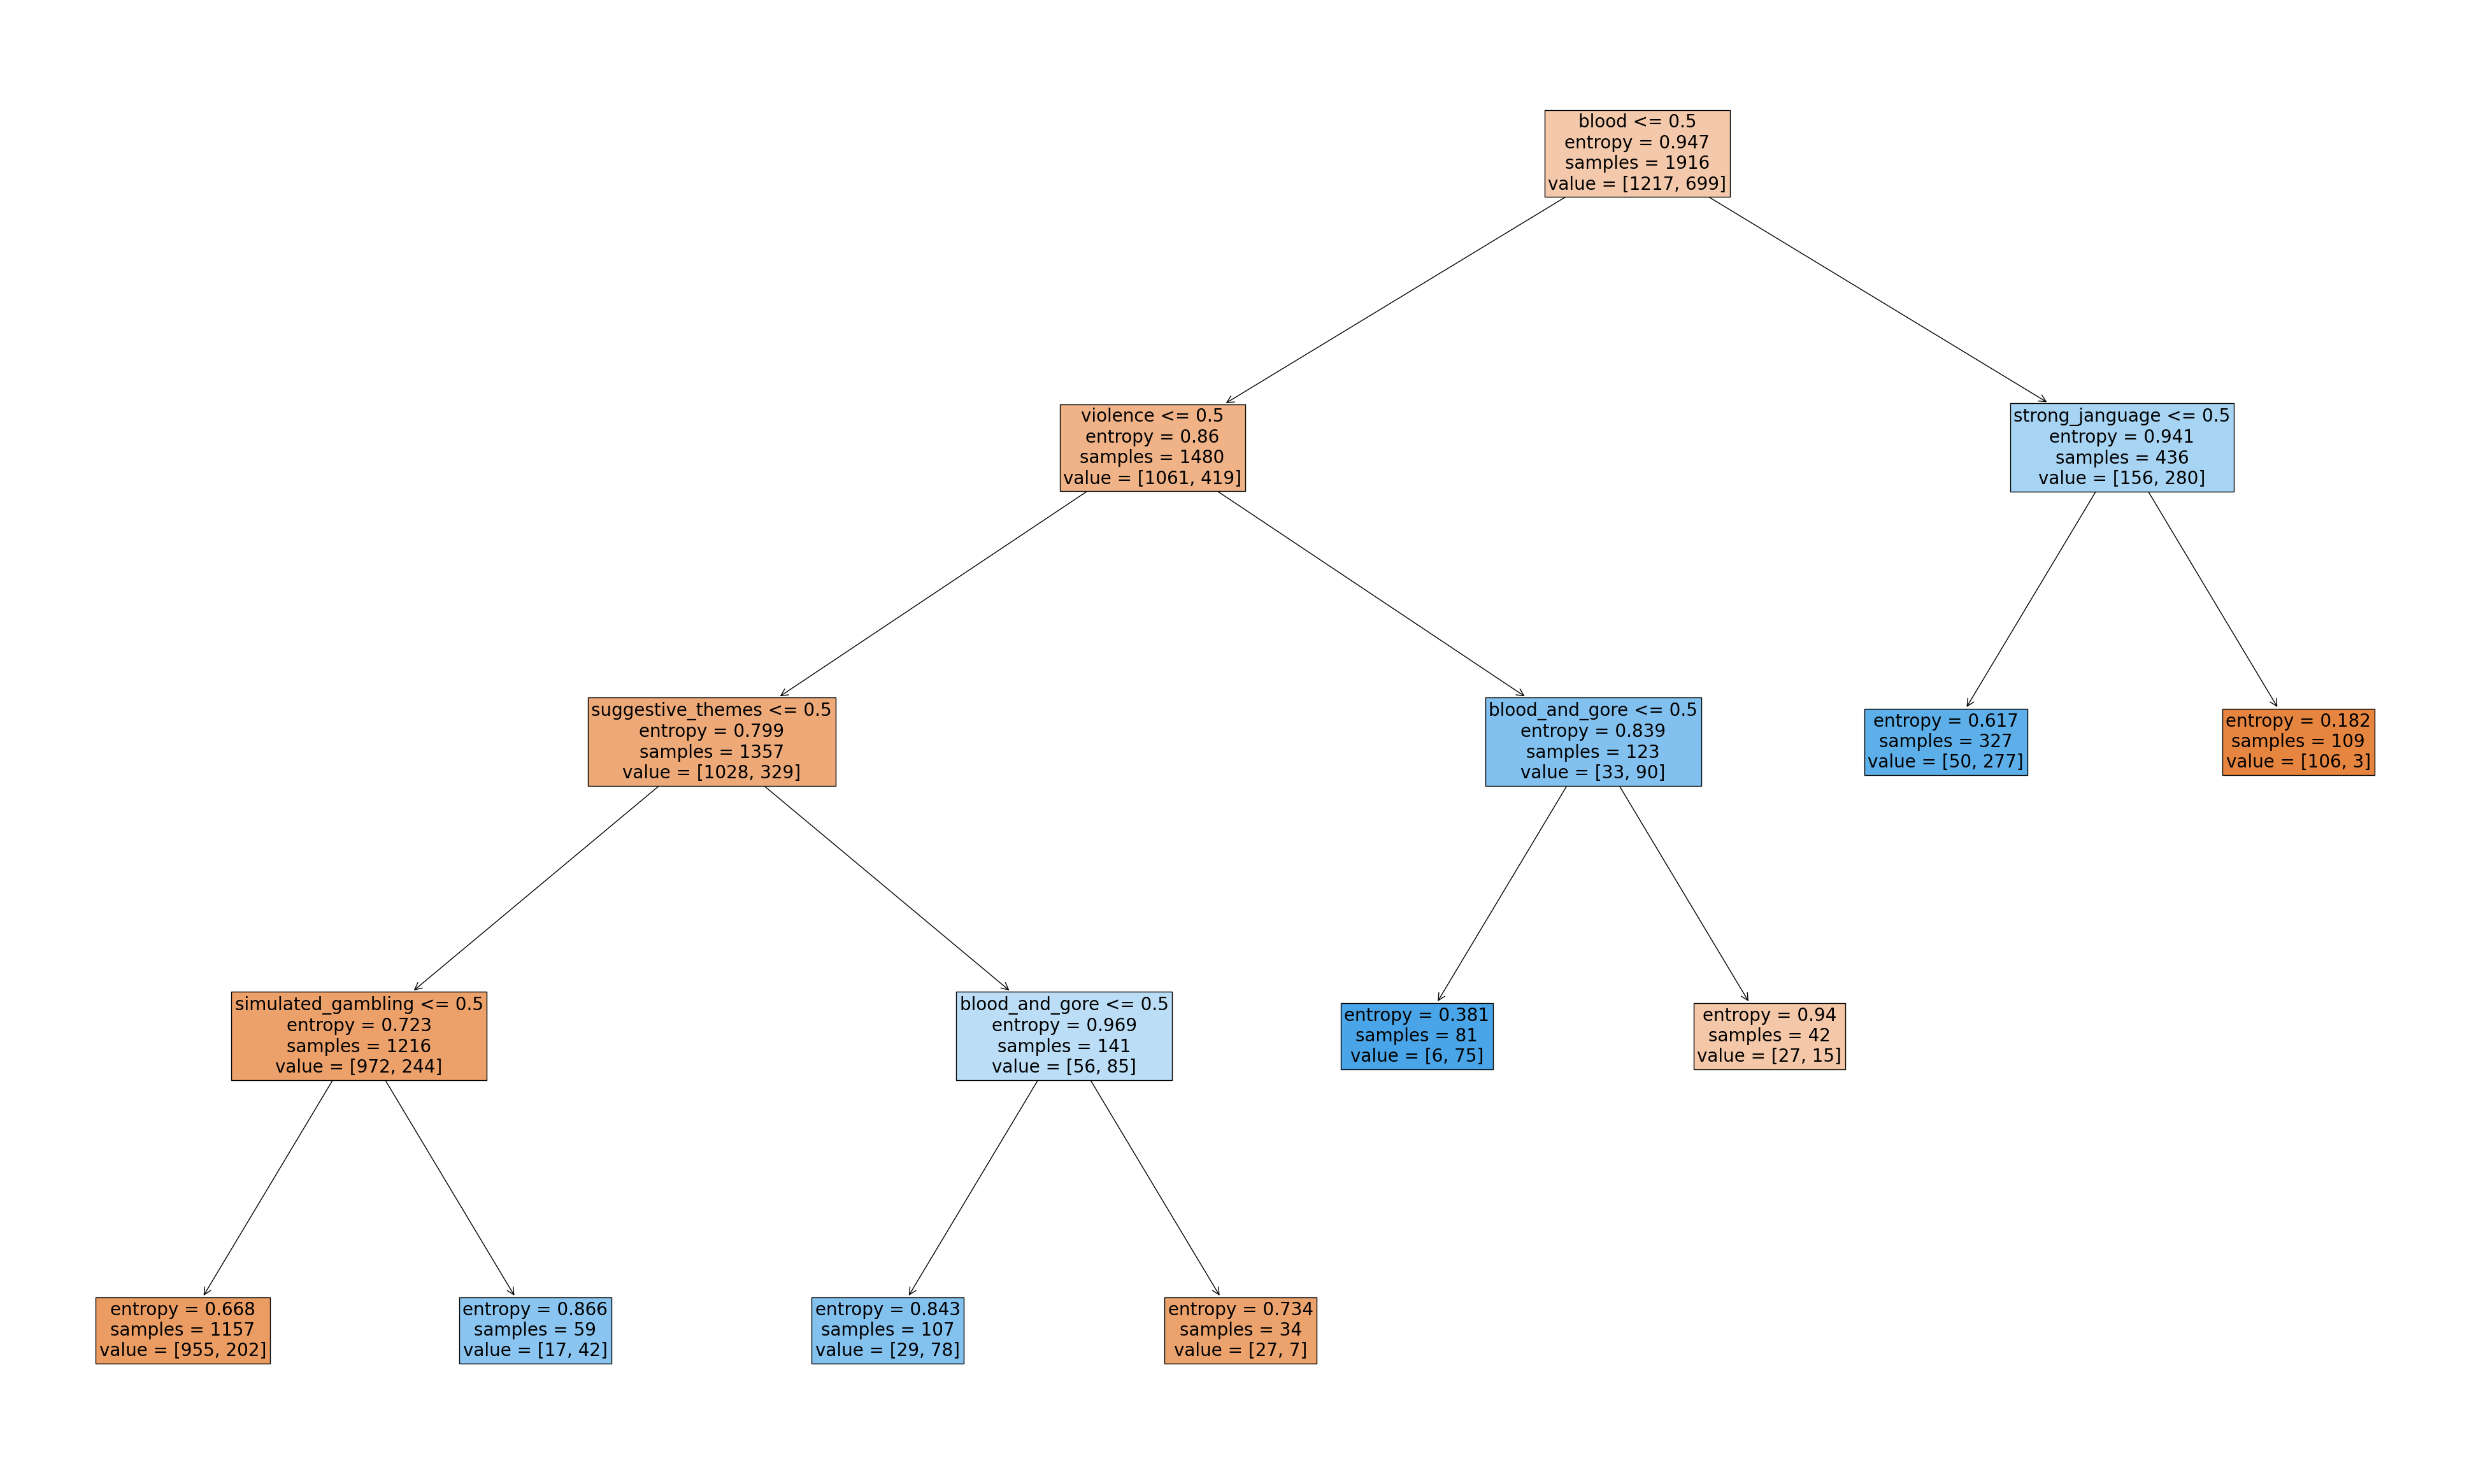

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 30), dpi=100)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns, max_depth = 4);

# C5.0 (Multiclass + All Features)

In [ ]:
map = {
    'T': 0,
    'E': 1,
    'ET': 2,
    'M': 3
}
df['esrb_rating'] = df['esrb_rating'].map(map)
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Maid of Sker,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Batman: The Enemy Within - Season Pass,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,Skylight Freerange,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,3


In [ ]:
attr = df.drop(['esrb_rating', 'title'], axis = 1)
target = df['esrb_rating']
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size = 0.2, random_state = 7)
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, splitter = 'best', max_leaf_nodes = 8)
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

In [ ]:
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:")
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.6805845511482255  

 Confusion Matrix:
[[79 57 26 12]
 [ 0 90  0  0]
 [ 0 43 73  0]
 [11  3  1 84]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.45      0.60       174
           1       0.47      1.00      0.64        90
           2       0.73      0.63      0.68       116
           3       0.88      0.85      0.86        99

    accuracy                           0.68       479
   macro avg       0.74      0.73      0.69       479
weighted avg       0.76      0.68      0.68       479



# C5.0 (Binary Classification + Top 20)

In [ ]:
df_bin_top_20.head()

,title,strong_janguage,blood,violence,crude_humor,mild_fantasy_violence,suggestive_themes,use_of_alcohol,mild_violence,blood_and_gore,...,animated_blood,simulated_gambling,language,mild_suggestive_themes,use_of_drugs_and_alcohol,mild_lyrics,sexual_themes,cartoon_violence,lyrics,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Maid of Sker,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Batman: The Enemy Within - Season Pass,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,Skylight Freerange,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
attr = df_bin_top_20.drop(['esrb_rating', 'title'], axis = 1)
target = df_bin_top_20['esrb_rating']
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size = 0.2, random_state = 7)
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, splitter = 'best', max_leaf_nodes = 8)
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

In [ ]:
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:")
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.8496868475991649  

 Confusion Matrix:
[[283  22]
 [ 50 124]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       305
           1       0.85      0.71      0.77       174

    accuracy                           0.85       479
   macro avg       0.85      0.82      0.83       479
weighted avg       0.85      0.85      0.85       479



# C5.0 (Multiclass + Top 20)

In [ ]:
map = {
    'T': 0,
    'E': 1,
    'ET': 2,
    'M': 3
}
df_top_20['esrb_rating'] = df_top_20['esrb_rating'].map(map)
df_top_20.head()

,title,strong_janguage,blood,blood_and_gore,fantasy_violence,cartoon_violence,mild_fantasy_violence,violence,crude_humor,strong_sexual_content,...,suggestive_themes,intense_violence,sexual_themes,mild_blood,language,alcohol_reference,simulated_gambling,mild_suggestive_themes,use_of_alcohol,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,Maid of Sker,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,Batman: The Enemy Within - Season Pass,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,Skylight Freerange,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,NaN


In [ ]:
attr = df_top_20.drop(['esrb_rating', 'title'], axis = 1)
target = df_top_20['esrb_rating']
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size = 0.2, random_state = 7)
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, splitter = 'best', max_leaf_nodes = 8)
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

In [ ]:
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:")
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.6805845511482255  

 Confusion Matrix:
[[79 57 26 12]
 [ 0 90  0  0]
 [ 0 43 73  0]
 [11  3  1 84]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.45      0.60       174
           1       0.47      1.00      0.64        90
           2       0.73      0.63      0.68       116
           3       0.88      0.85      0.86        99

    accuracy                           0.68       479
   macro avg       0.74      0.73      0.69       479
weighted avg       0.76      0.68      0.68       479



# SVM (Multiclass + All Features)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC

In [ ]:
attr = df.drop(['title', 'esrb_rating'], axis=1)
target = df['esrb_rating']
target.head()

0    0
1    3
2    1
3    3
4    3
Name: esrb_rating, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,1.042227,-0.230673,-0.091766,-0.548565,-0.382012,-0.143009,-0.232674,-0.188286,-0.546632,-0.350474,...,-0.151878,-0.179799,-0.223558,-0.247271,-0.341394,-0.200997,-0.349722,-0.177309,-0.153311,2.776525
1,1.042227,-0.230673,-0.091766,-0.548565,2.617720,-0.143009,-0.232674,-0.188286,-0.546632,-0.350474,...,-0.151878,-0.179799,-0.223558,-0.247271,2.929164,-0.200997,-0.349722,-0.177309,-0.153311,-0.360162
2,-0.959484,-0.230673,-0.091766,-0.548565,-0.382012,-0.143009,-0.232674,-0.188286,-0.546632,-0.350474,...,-0.151878,-0.179799,-0.223558,-0.247271,-0.341394,-0.200997,-0.349722,-0.177309,-0.153311,-0.360162
3,1.042227,-0.230673,-0.091766,-0.548565,2.617720,-0.143009,-0.232674,-0.188286,-0.546632,-0.350474,...,-0.151878,-0.179799,-0.223558,-0.247271,-0.341394,-0.200997,-0.349722,-0.177309,-0.153311,2.776525
4,-0.959484,-0.230673,-0.091766,1.822938,-0.382012,-0.143009,-0.232674,-0.188286,1.829383,-0.350474,...,-0.151878,-0.179799,-0.223558,-0.247271,2.929164,-0.200997,2.859413,-0.177309,-0.153311,-0.360162


In [ ]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 4, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

2212    2
1644    2
487     1
2206    2
485     1
Name: esrb_rating, dtype: int64

In [ ]:
# import SVM classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier
svc=SVC()

# fit classifier to training set
svc.fit(attr_train,target_train)


# make predictions on test set
target_pred=svc.predict(attr_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))



Model accuracy score with default hyperparameters: 0.8831

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       205
           1       0.97      0.98      0.98       131
           2       0.88      0.80      0.84       137
           3       0.95      0.85      0.90       126

    accuracy                           0.88       599
   macro avg       0.90      0.88      0.89       599
weighted avg       0.89      0.88      0.88       599


Confusion Matrix
[[184   1  14   6]
 [  1 129   1   0]
 [ 25   3 109   0]
 [ 19   0   0 107]]


#SVM (Binary Classification + Top 20)

In [ ]:
df_bin_top_20.head()
attr = df_bin_top_20.drop(columns = ['title', 'esrb_rating'])
target = df_bin_top_20['esrb_rating']

In [ ]:
print(target.head())

0    1
1    0
2    0
3    0
4    0
Name: esrb_rating, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,strong_janguage,blood,violence,crude_humor,mild_fantasy_violence,suggestive_themes,use_of_alcohol,mild_violence,blood_and_gore,mild_blood,strong_sexual_content,animated_blood,simulated_gambling,language,mild_suggestive_themes,use_of_drugs_and_alcohol,mild_lyrics,sexual_themes,cartoon_violence,lyrics
0,-0.341394,-0.548565,2.776525,-0.232674,-0.229668,-0.349722,-0.177309,-0.213061,-0.382012,-0.27816,-0.200997,-0.091766,-0.247271,-0.356453,-0.213061,-0.153311,-0.283353,-0.223558,-0.143009,-0.189472
1,2.929164,-0.548565,-0.360162,-0.232674,-0.229668,-0.349722,-0.177309,-0.213061,2.617720,-0.27816,-0.200997,-0.091766,-0.247271,-0.356453,-0.213061,-0.153311,-0.283353,-0.223558,-0.143009,-0.189472
2,-0.341394,-0.548565,-0.360162,-0.232674,-0.229668,-0.349722,-0.177309,-0.213061,-0.382012,-0.27816,-0.200997,-0.091766,-0.247271,-0.356453,-0.213061,-0.153311,-0.283353,-0.223558,-0.143009,-0.189472
3,-0.341394,-0.548565,2.776525,-0.232674,-0.229668,-0.349722,-0.177309,-0.213061,2.617720,-0.27816,-0.200997,-0.091766,-0.247271,-0.356453,-0.213061,-0.153311,3.529172,-0.223558,-0.143009,-0.189472
4,2.929164,1.822938,-0.360162,-0.232674,-0.229668,2.859413,-0.177309,-0.213061,-0.382012,-0.27816,-0.200997,-0.091766,-0.247271,-0.356453,-0.213061,-0.153311,-0.283353,-0.223558,-0.143009,-0.189472


In [ ]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 4, shuffle = True)
target_train.head()
attr_train.head()
target_test.head()

2212    0
1644    0
487     0
2206    0
485     0
Name: esrb_rating, dtype: int64

In [ ]:
# import SVM classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier
svc=SVC()

# fit classifier to training set
svc.fit(attr_train,target_train)


# make predictions on test set
target_pred=svc.predict(attr_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Model accuracy score with default hyperparameters: 0.8798

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       394
           1       0.80      0.86      0.83       205

    accuracy                           0.88       599
   macro avg       0.86      0.87      0.87       599
weighted avg       0.88      0.88      0.88       599


Confusion Matrix
[[351  43]
 [ 29 176]]


#SVM (Multiclass + Top 20)

In [ ]:
df_top_20.head()

,title,strong_janguage,blood,blood_and_gore,fantasy_violence,cartoon_violence,mild_fantasy_violence,violence,crude_humor,strong_sexual_content,...,suggestive_themes,intense_violence,sexual_themes,mild_blood,language,alcohol_reference,simulated_gambling,mild_suggestive_themes,use_of_alcohol,esrb_rating
0,World of Warships Legends: Firepower Deluxe Ed...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Maid of Sker,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Mahjong Carnival,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Batman: The Enemy Within - Season Pass,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Skylight Freerange,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3


In [ ]:
attr = df_top_20.drop(columns = ['title', 'esrb_rating'])
target = df_top_20['esrb_rating']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,strong_janguage,blood,blood_and_gore,fantasy_violence,cartoon_violence,mild_fantasy_violence,violence,crude_humor,strong_sexual_content,mild_violence,animated_blood,suggestive_themes,intense_violence,sexual_themes,mild_blood,language,alcohol_reference,simulated_gambling,mild_suggestive_themes,use_of_alcohol
0,-0.341394,-0.548565,-0.382012,-0.546632,-0.143009,-0.229668,2.776525,-0.232674,-0.200997,-0.213061,-0.091766,-0.349722,-0.350474,-0.223558,-0.27816,-0.356453,-0.230673,-0.247271,-0.213061,-0.177309
1,2.929164,-0.548565,2.617720,-0.546632,-0.143009,-0.229668,-0.360162,-0.232674,-0.200997,-0.213061,-0.091766,-0.349722,-0.350474,-0.223558,-0.27816,-0.356453,-0.230673,-0.247271,-0.213061,-0.177309
2,-0.341394,-0.548565,-0.382012,-0.546632,-0.143009,-0.229668,-0.360162,-0.232674,-0.200997,-0.213061,-0.091766,-0.349722,-0.350474,-0.223558,-0.27816,-0.356453,-0.230673,-0.247271,-0.213061,-0.177309
3,-0.341394,-0.548565,2.617720,-0.546632,-0.143009,-0.229668,2.776525,-0.232674,-0.200997,-0.213061,-0.091766,-0.349722,-0.350474,-0.223558,-0.27816,-0.356453,-0.230673,-0.247271,-0.213061,-0.177309
4,2.929164,1.822938,-0.382012,1.829383,-0.143009,-0.229668,-0.360162,-0.232674,-0.200997,-0.213061,-0.091766,2.859413,-0.350474,-0.223558,-0.27816,-0.356453,-0.230673,-0.247271,-0.213061,-0.177309


In [ ]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 4, shuffle = True)
#target_train.head()
#attr_train.head()
target_test.head()

2212    2
1644    2
487     1
2206    2
485     1
Name: esrb_rating, dtype: int64

In [ ]:
# import SVM classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier
svc=SVC()

# fit classifier to training set
svc.fit(attr_train,target_train)


# make predictions on test set
target_pred=svc.predict(attr_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Model accuracy score with default hyperparameters: 0.8614

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       205
           1       0.95      0.98      0.96       131
           2       0.83      0.78      0.80       137
           3       0.90      0.88      0.89       126

    accuracy                           0.86       599
   macro avg       0.87      0.87      0.87       599
weighted avg       0.86      0.86      0.86       599


Confusion Matrix
[[170   3  20  12]
 [  1 128   2   0]
 [ 26   4 107   0]
 [ 15   0   0 111]]


#SVM (Binary + All Features)

In [ ]:
attr = df_bin.drop(['title', 'esrb_rating'], axis=1)
target = df_bin['esrb_rating']
target.head()

0    1
1    0
2    0
3    0
4    0
Name: esrb_rating, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,1.042227,-0.230673,-0.091766,-0.548565,-0.382012,-0.143009,-0.232674,-0.188286,-0.546632,-0.350474,...,-0.151878,-0.179799,-0.223558,-0.247271,-0.341394,-0.200997,-0.349722,-0.177309,-0.153311,2.776525
1,1.042227,-0.230673,-0.091766,-0.548565,2.617720,-0.143009,-0.232674,-0.188286,-0.546632,-0.350474,...,-0.151878,-0.179799,-0.223558,-0.247271,2.929164,-0.200997,-0.349722,-0.177309,-0.153311,-0.360162
2,-0.959484,-0.230673,-0.091766,-0.548565,-0.382012,-0.143009,-0.232674,-0.188286,-0.546632,-0.350474,...,-0.151878,-0.179799,-0.223558,-0.247271,-0.341394,-0.200997,-0.349722,-0.177309,-0.153311,-0.360162
3,1.042227,-0.230673,-0.091766,-0.548565,2.617720,-0.143009,-0.232674,-0.188286,-0.546632,-0.350474,...,-0.151878,-0.179799,-0.223558,-0.247271,-0.341394,-0.200997,-0.349722,-0.177309,-0.153311,2.776525
4,-0.959484,-0.230673,-0.091766,1.822938,-0.382012,-0.143009,-0.232674,-0.188286,1.829383,-0.350474,...,-0.151878,-0.179799,-0.223558,-0.247271,2.929164,-0.200997,2.859413,-0.177309,-0.153311,-0.360162


In [ ]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 4, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

2212    0
1644    0
487     0
2206    0
485     0
Name: esrb_rating, dtype: int64

In [ ]:
# import SVM classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier
svc=SVC()

# fit classifier to training set
svc.fit(attr_train,target_train)


# make predictions on test set
target_pred=svc.predict(attr_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))



Model accuracy score with default hyperparameters: 0.8915

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       394
           1       0.82      0.88      0.85       205

    accuracy                           0.89       599
   macro avg       0.88      0.89      0.88       599
weighted avg       0.89      0.89      0.89       599


Confusion Matrix
[[354  40]
 [ 25 180]]


#KMeans (Multiclass + All Features)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
attr = df.drop(columns = ['title', 'esrb_rating'])
target  = df['esrb_rating']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()
target.head()

0    0
1    3
2    1
3    3
4    3
Name: esrb_rating, dtype: int64

In [ ]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=12)
kmeans.fit(attr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import pandas as pd
df_cluster=pd.DataFrame({'Actual':target,'Cluster':labels})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

Cluster    0    1
Actual           
0        195  678
1          0  516
2         61  468
3        326  151


#KMeans (Binary Classification + Top 20)

In [ ]:
df_bin_top_20.head()
attr = df_bin_top_20.drop(columns = ['title', 'esrb_rating'])
target = df_bin_top_20['esrb_rating']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()
target.head()

0    1
1    0
2    0
3    0
4    0
Name: esrb_rating, dtype: int64

In [ ]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=12)
kmeans.fit(attr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import pandas as pd
df_cluster=pd.DataFrame({'Actual':target,'Cluster':labels})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

Cluster     0    1
Actual            
0        1253  269
1         831   42


#KMeans (Multiclass + Top 20)

In [ ]:
print(df_top_20['esrb_rating'])
attr = df_top_20.drop(columns = ['title', 'esrb_rating'])
target = df_top_20['esrb_rating']

0       0
1       3
2       1
3       3
4       3
       ..
2390    1
2391    2
2392    0
2393    0
2394    2
Name: esrb_rating, Length: 2395, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()
target.head()

0    0
1    3
2    1
3    3
4    3
Name: esrb_rating, dtype: int64

In [ ]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=12)
kmeans.fit(attr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import pandas as pd
df_cluster=pd.DataFrame({'Actual':target,'Cluster':labels})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

Cluster    0    1
Actual           
0        805   68
1        516    0
2        525    4
3        211  266


#KMeans (Binary + All Features)

In [ ]:
attr = df_bin.drop(columns = ['title', 'esrb_rating'])
target  = df_bin['esrb_rating']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()
target.head()

0    1
1    0
2    0
3    0
4    0
Name: esrb_rating, dtype: int64

In [ ]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=12)
kmeans.fit(attr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import pandas as pd
df_cluster=pd.DataFrame({'Actual':target,'Cluster':labels})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

Cluster    0     1
Actual            
0        387  1135
1        195   678


# Naive Bayes (Binary + All Features)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
attr = df_bin.drop(columns = ['title', 'esrb_rating'])
target = df_bin['esrb_rating']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=5)

# Create a Bernoulli Naive Bayes model
cnb = BernoulliNB()

# Train the model
cnb.fit(attr_train, target_train)

# # Make predictions on the test set
target_pred = cnb.predict(attr_test)

# Evaluate the accuracy
accuracy = accuracy_score(target_test, target_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Accuracy: 0.847009735744089
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       463
           1       0.83      0.72      0.77       256

    accuracy                           0.85       719
   macro avg       0.84      0.82      0.83       719
weighted avg       0.85      0.85      0.84       719


Confusion Matrix
[[424  39]
 [ 71 185]]


## Naive Bayes (Binary + Top 20)

In [ ]:
attr = df_bin_top_20.drop(columns = ['title', 'esrb_rating'])
target = df_bin_top_20['esrb_rating']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=5)

# Create a Bernoulli Naive Bayes model
cnb = BernoulliNB()

# Train the model
cnb.fit(attr_train, target_train)

# # Make predictions on the test set
target_pred = cnb.predict(attr_test)

# Evaluate the accuracy
accuracy = accuracy_score(target_test, target_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Accuracy: 0.8511821974965229
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       463
           1       0.83      0.73      0.78       256

    accuracy                           0.85       719
   macro avg       0.84      0.83      0.83       719
weighted avg       0.85      0.85      0.85       719


Confusion Matrix
[[424  39]
 [ 68 188]]


## Naive Bayes (Multiclass + All Features)

In [ ]:
attr = df.drop(columns = ['title', 'esrb_rating'])
target = df['esrb_rating']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=5)

# Create a Bernoulli Naive Bayes model
cnb = BernoulliNB()

# Train the model
cnb.fit(attr_train, target_train)

# # Make predictions on the test set
target_pred = cnb.predict(attr_test)

# Evaluate the accuracy
accuracy = accuracy_score(target_test, target_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Accuracy: 0.8261474269819193
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       256
           1       0.90      0.98      0.94       161
           2       0.72      0.78      0.75       161
           3       0.91      0.82      0.86       141

    accuracy                           0.83       719
   macro avg       0.83      0.84      0.83       719
weighted avg       0.83      0.83      0.83       719


Confusion Matrix
[[195   6  44  11]
 [  1 157   3   0]
 [ 23  11 126   1]
 [ 23   0   2 116]]


## Naive Bayes (Multiclass + Top 20)

In [ ]:
attr = df_top_20.drop(columns = ['title', 'esrb_rating'])
target = df_top_20['esrb_rating']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=5)

# Create a Bernoulli Naive Bayes model
cnb = BernoulliNB()

# Train the model
cnb.fit(attr_train, target_train)

# # Make predictions on the test set
target_pred = cnb.predict(attr_test)

# Evaluate the accuracy
accuracy = accuracy_score(target_test, target_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Accuracy: 0.8233657858136301
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       256
           1       0.92      0.98      0.95       161
           2       0.73      0.76      0.75       161
           3       0.92      0.81      0.86       141

    accuracy                           0.82       719
   macro avg       0.84      0.83      0.83       719
weighted avg       0.83      0.82      0.82       719


Confusion Matrix
[[199   7  41   9]
 [  4 157   0   0]
 [ 31   7 122   1]
 [ 24   0   3 114]]


## CART (Binary + All Features)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

attr = df_bin.drop(columns = ['title', 'esrb_rating'])
target = df_bin['esrb_rating']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

model = DecisionTreeClassifier(criterion='gini')
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(confusion_matrix(target_test,target_pred))
print()
print(classification_report(target_test,target_pred))

[[435  31]
 [ 57 196]]

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       466
           1       0.86      0.77      0.82       253

    accuracy                           0.88       719
   macro avg       0.87      0.85      0.86       719
weighted avg       0.88      0.88      0.88       719



## CART (Binary + Top 20)

In [ ]:
attr = df_bin_top_20.drop(columns = ['title', 'esrb_rating'])
target = df_bin_top_20['esrb_rating']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

model = DecisionTreeClassifier(criterion='gini')
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(confusion_matrix(target_test,target_pred))
print()
print(classification_report(target_test,target_pred))

[[431  35]
 [ 55 198]]

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       466
           1       0.85      0.78      0.81       253

    accuracy                           0.87       719
   macro avg       0.87      0.85      0.86       719
weighted avg       0.87      0.87      0.87       719



## CART (Multiclass + All Features)

In [ ]:
attr = df.drop(columns = ['title', 'esrb_rating'])
target = df['esrb_rating']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

model = DecisionTreeClassifier(criterion='gini')
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(confusion_matrix(target_test,target_pred))
print()
print(classification_report(target_test,target_pred))

[[210   3  31   9]
 [  2 143   3   0]
 [ 27   8 130   1]
 [ 18   0   1 133]]

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       253
           1       0.93      0.97      0.95       148
           2       0.79      0.78      0.79       166
           3       0.93      0.88      0.90       152

    accuracy                           0.86       719
   macro avg       0.87      0.86      0.86       719
weighted avg       0.86      0.86      0.86       719



## CART (Multiclass + Top 20)

In [ ]:
attr = df_top_20.drop(columns = ['title', 'esrb_rating'])
target = df_top_20['esrb_rating']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

model = DecisionTreeClassifier(criterion='gini')
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(confusion_matrix(target_test,target_pred))
print()
print(classification_report(target_test,target_pred))

[[209   4  29  11]
 [  1 144   3   0]
 [ 19  10 136   1]
 [ 13   2   1 136]]

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       253
           1       0.90      0.97      0.94       148
           2       0.80      0.82      0.81       166
           3       0.92      0.89      0.91       152

    accuracy                           0.87       719
   macro avg       0.87      0.88      0.87       719
weighted avg       0.87      0.87      0.87       719



In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns, max_depth=3);